In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [112]:
df = pd.read_csv("kc_house_data.csv")

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [114]:
df.columns.unique()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [115]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No null values, great !

In [116]:
df.drop(["id"],axis=1,inplace=True)

wse need to drop the id column

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

id dropped with success !

<Figure size 1080x1080 with 0 Axes>

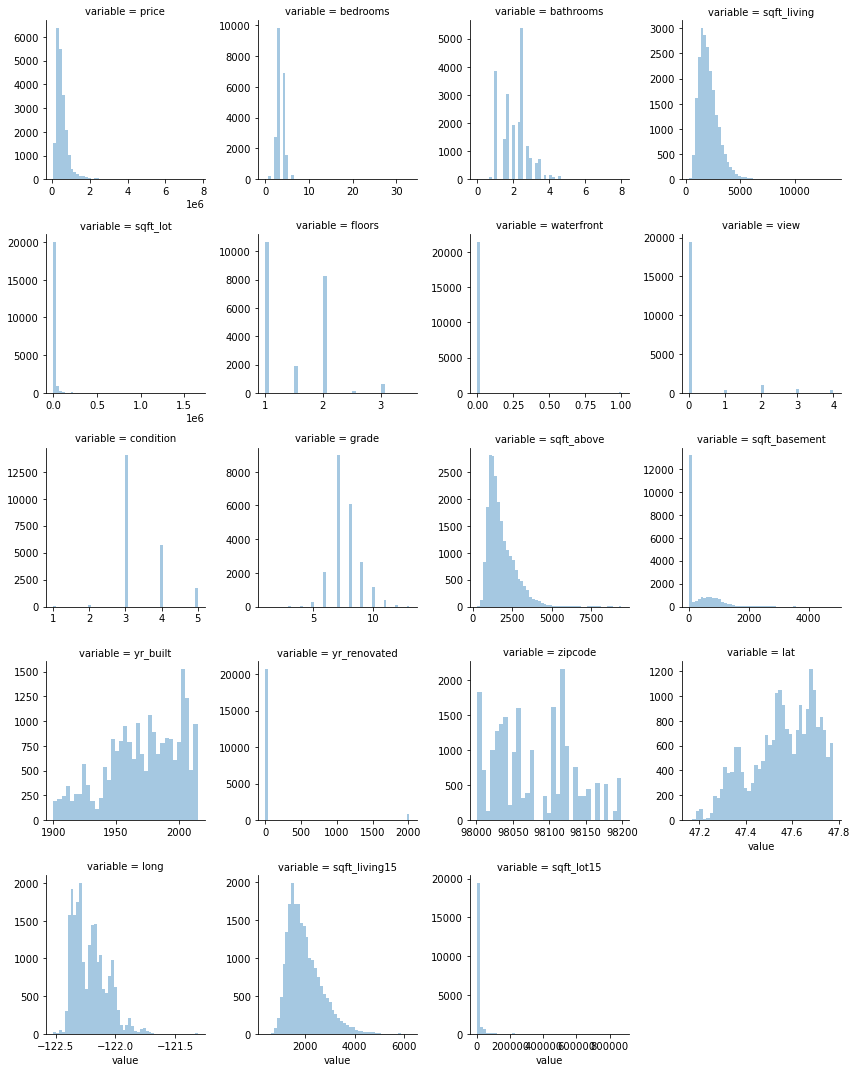

In [ ]:
#Checking categorical variables feature by feature
plt.figure(figsize=[15,15])
a = pd.melt(df.drop("date",axis=1))
figure=sns.FacetGrid(data=a,col="variable",col_wrap=4,sharex=False,sharey=False)
figure=figure.map(sns.distplot,"value",kde=False)

In [119]:
columns = ["condition","waterfront","view","grade"]
df[columns]=df[columns].astype("category")

We can see that garde, condition, waterfront, view and floors are categorical variables, this we need to convert them !

#convert categorical variables into values using one hot encoding 
new= pd.get_dummies(df['grade'])
df=df.drop(['grade'], axis=1)
df=df.join(new)
df

<AxesSubplot:>

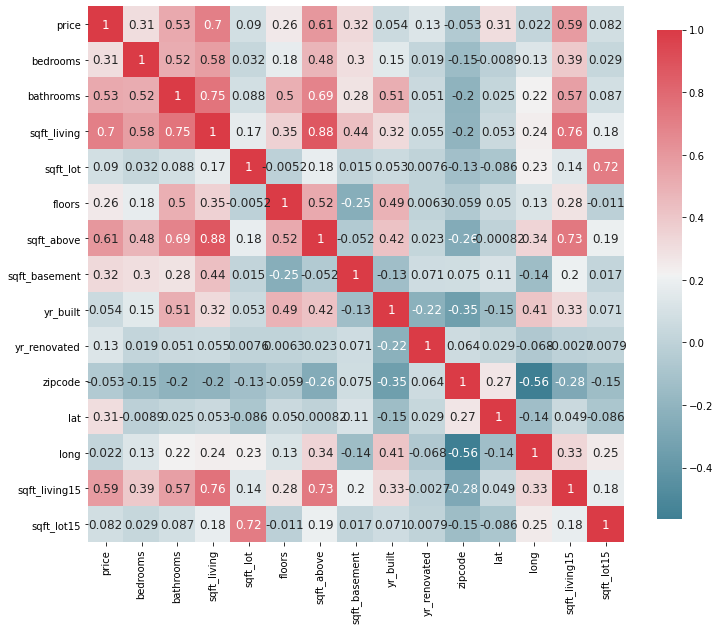

In [125]:
s , ax = plt.subplots( figsize =( 12 , 10 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
sns.heatmap( df.corr() , annot=True,cmap =cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot_kws = { 'fontsize' : 12 })

From the heatmap above we can chose sqft_living, sqft_above as our features since they're highly correlated with the price variable

Accuracy is:  0.875


<AxesSubplot:>

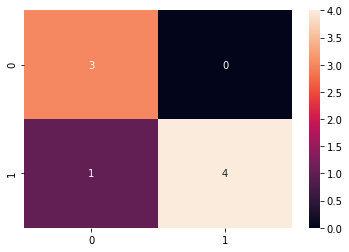

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 80 % and test 20 %
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=None)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")